# K Means Clustering:
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement Clustering techniques.

In [1]:
# Imorting required libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Importing data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [3]:
# Shape of dataset
df.shape

(150, 6)

In [4]:
# 5 point summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# missing count
df_missing = pd.DataFrame({'count':df.isna().sum(),'percentage':df.isna().sum()/len(df)*100})
df_missing

,count,percentage
Id,0,0.0
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


In [ ]:
sns.heatmap(df.isnull(),cbar=False)

# symmetry check

In [7]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

# UNIVARIATE ANALYSIS

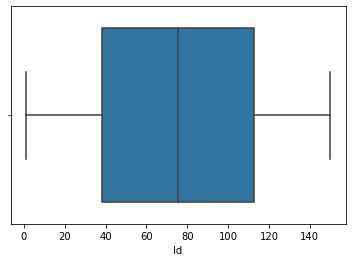

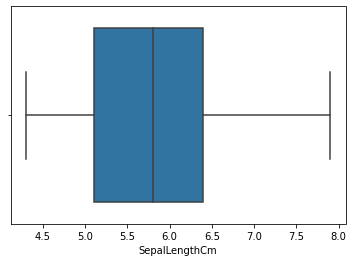

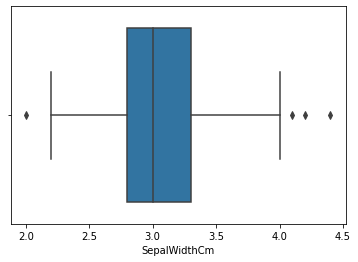

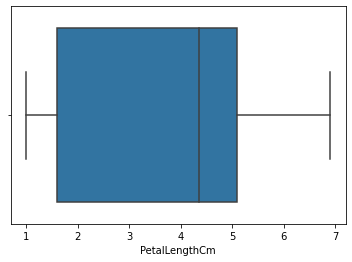

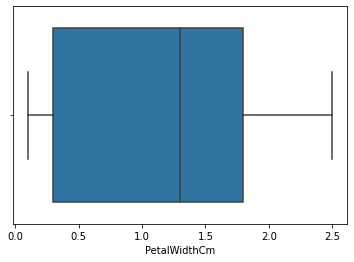

In [8]:
#Plotting box plot for all Numeric features to observe spread of the data
for i in df.drop('Species',1).columns:
    sns.boxplot(df[i])
    plt.show()

# MULTIVARIATE ANALYSIS

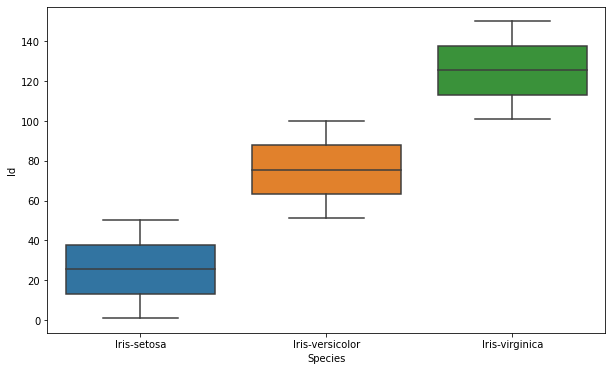

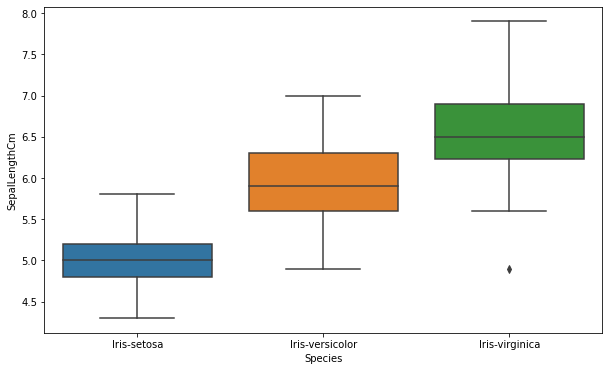

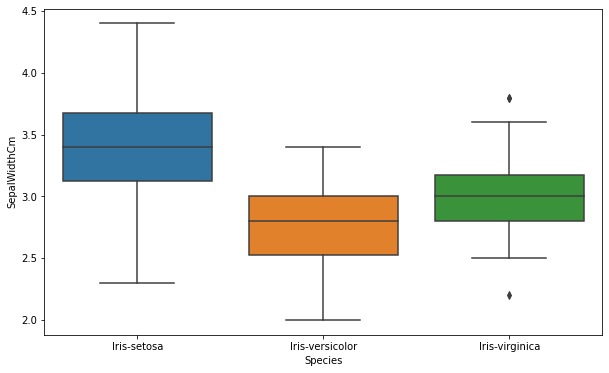

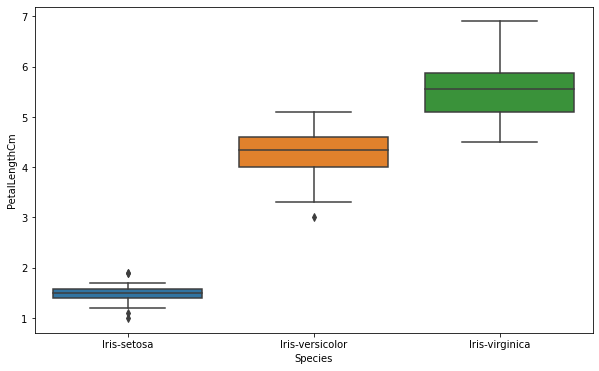

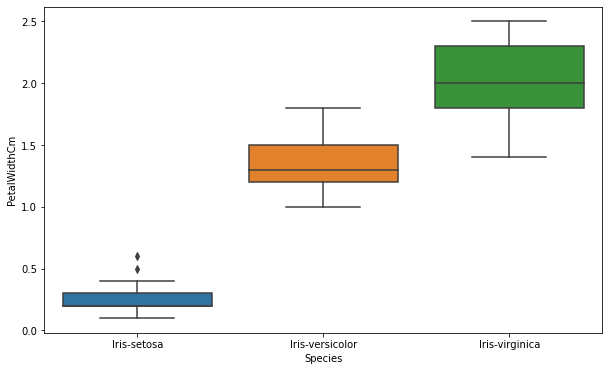

In [9]:
#Plotting box plot for all Numeric features to observe spread of the data
plt.rcParams['figure.figsize'] = (10,6)
for i in df.drop('Species',1).columns:
    sns.boxplot(df['Species'],df[i])
    plt.show()

# CORRELATION

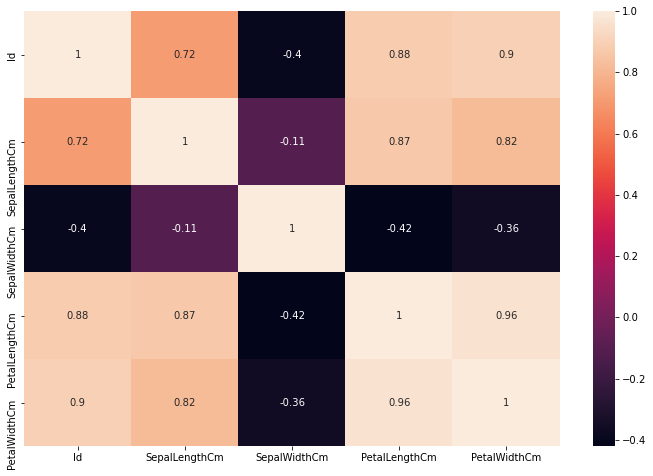

In [14]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(),annot=True)


# PAIRPLOTS

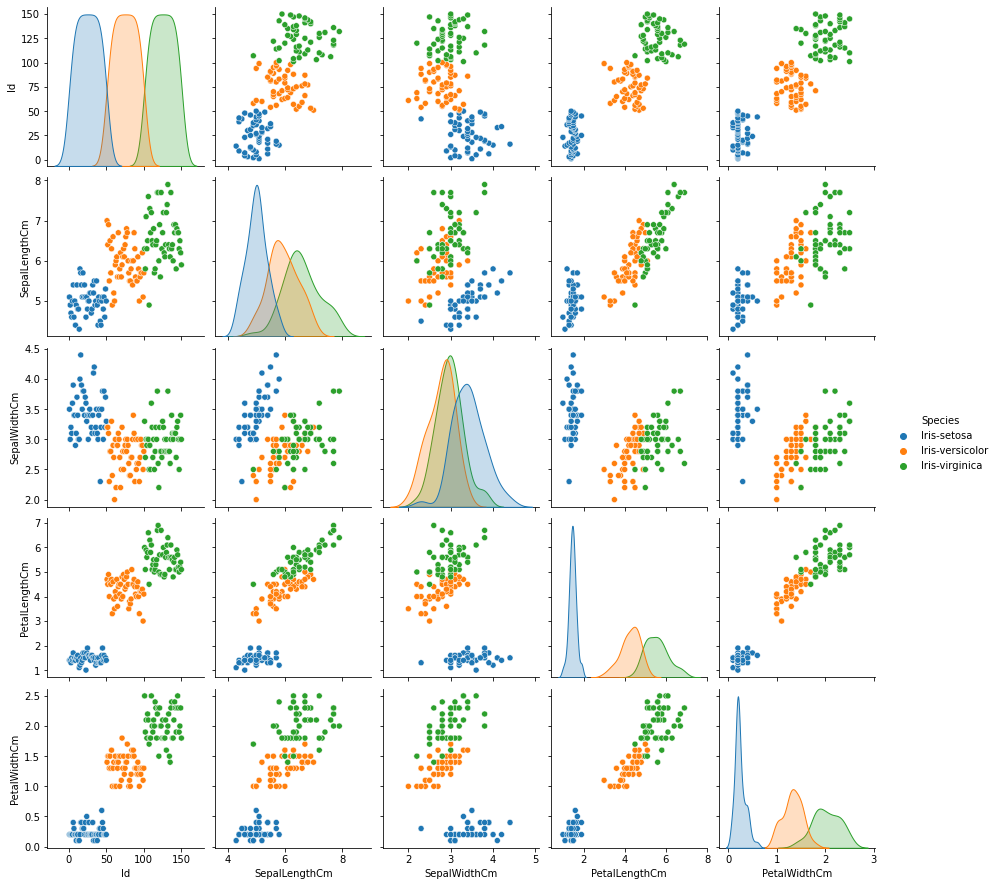

In [15]:
sns.pairplot(df,diag_kind='kde',hue='Species')
plt.show()

# FEATURE SELECTION

In [16]:
df = df.drop('Id',1)

In [17]:
df_new = df.drop('Species',1)
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Clustering-Kmeans


# Elbow plot

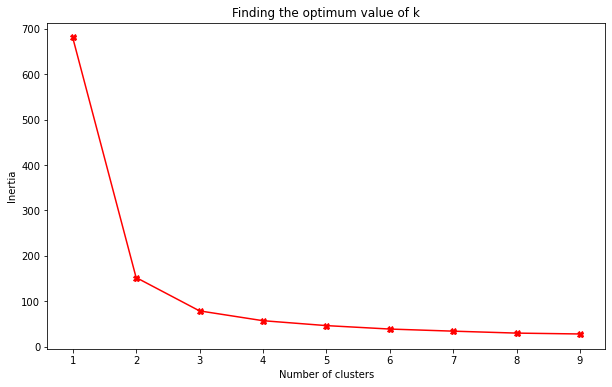

In [18]:
# Calculating inertia:
err = []

for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_new)
    err.append(kmeans.inertia_)
    
# Visualization of k values:
# Elbow plot:

plt.figure(figsize=(10,6))
plt.plot(range(1,10), err, color='red',marker = 'X')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Confirming the same by math score

for clusters in range(2,10):
    model =  KMeans(clusters)
    model.fit(df_new)
    sil_score = silhouette_score(df_new, model.labels_)
    print('silhouette_score for ', clusters, 'clusters : ', sil_score)

silhouette_score for  2 clusters :  0.6808136202936816
silhouette_score for  3 clusters :  0.5525919445499757
silhouette_score for  4 clusters :  0.4978256901095472
silhouette_score for  5 clusters :  0.4885175508886279
silhouette_score for  6 clusters :  0.3665040150235965
silhouette_score for  7 clusters :  0.35766947659842097
silhouette_score for  8 clusters :  0.3487105542579545
silhouette_score for  9 clusters :  0.32089097687941065


In [20]:
#lets try to build Kmeans with the considered clusters

kmeans = KMeans(n_clusters=3)
model_3 = kmeans.fit(df_new)
model_3_inertia = model_3.inertia_
centres_3 = model_3.cluster_centers_
labels_3 = model_3.labels_

print('Model Labels')
print('------------------')
print(labels_3)
print('\n')
print('Cluster Centers')
print('------------------')
print(centres_3)
print('\n')
print('Model Inertia')
print('------------------')
print(model_3_inertia)

Model Labels
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Cluster Centers
------------------
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Model Inertia
------------------
78.94084142614601


In [21]:
df_kmeans_3 = df_new.copy()
df_kmeans_3['labels']=labels_3
df_kmeans_3.sample(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
31,5.4,3.4,1.5,0.4,1
13,4.3,3.0,1.1,0.1,1


In [22]:
# Lets see clusters proportion

df_kmeans_3['labels'].value_counts()

2    62
1    50
0    38
Name: labels, dtype: int64

# Visualizing the Model Cluster

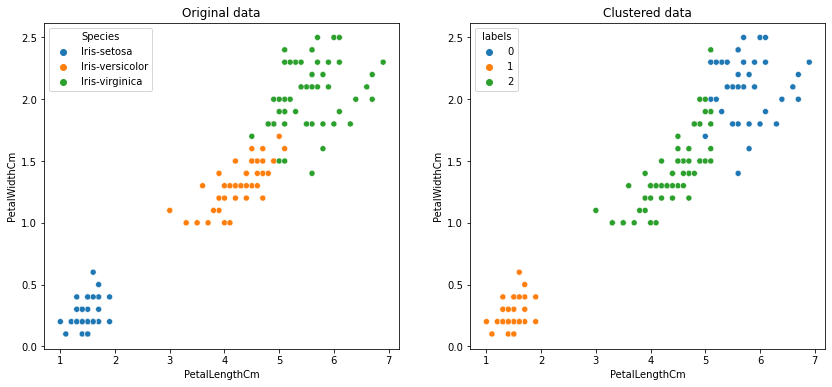

In [23]:
plt.rcParams['figure.figsize'] =(14,6)
plt.subplot(1,2,1)
plt.title('Original data')
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'],palette='tab10')
plt.subplot(1,2,2)
plt.title('Clustered data')
sns.scatterplot(x=df_kmeans_3['PetalLengthCm'],y=df_kmeans_3['PetalWidthCm'],hue=df_kmeans_3['labels'],palette='tab10')
plt.show()

# Conclusion
 3  clusters have formed by application of Kmeans and the clusters are quite well separated with no overlapping
When compared to original data the formed clusters were closely matching which concludes that KMeans done good job in clusters formation